

## Author: Priya Chakradhari  
## Focus: Exploratory Data Analysis & Machine Learning – Seaborn Taxi Dataset
> "This notebook explores the Seaborn Taxi dataset to understand trip patterns, fares, distances, and travel behavior, and builds a regression model to predict taxi fare based on trip and location features."
## LinkedIn: https://www.linkedin.com/in/priya-chakradhari/  
## GitHub: https://github.com/priyachakradhari  
## Twitter(X): https://x.com/PriyaChakr87701

## Metadata

This dataset contains information about NYC taxi trips, including trip details, passenger count, fares, and taxi attributes. Key columns include:

| Column Name     | Description                       |
| --------------- | --------------------------------- |
| pickup          | Pickup date and time of the trip  |
| dropoff         | Dropoff date and time of the trip |
| passengers      | Number of passengers in the taxi  |
| distance        | Distance traveled during the trip |
| fare            | Base fare amount for the trip     |
| tip             | Tip amount given by the passenger |
| tolls           | Tolls charged during the trip     |
| total           | Total cost of the trip            |
| color           | Color/type of the taxi            |
| payment         | Method of payment used            |
| pickup_zone     | Zone where the trip started       |
| dropoff_zone    | Zone where the trip ended         |
| pickup_borough  | Borough where the trip started    |
| dropoff_borough | Borough where the trip ended      |

This dataset can be used to analyze trip patterns, fare distributions, and passenger behavior. It is suitable for tasks such as exploratory data analysis, feature engineering, and building machine learning models to predict taxi fares. The mix of numerical and categorical features allows for testing different preprocessing and modeling approaches, making it an ideal dataset for both analytics and predictive modeling projects.

### Problem Statement:
> The objective of this project is to build a regression model that predicts taxi fare based on pickup and dropoff information, time of travel, and number of passengers. This helps estimate trip cost in advance and understand which factors influence taxi pricing.

> Goal: Predict fare using trip, time, and location features.

> Type: Supervised Regression

> Target: fare

# <h1 style= "color:#4DA3FF"> Analysis begins here.

##  1. Import Libraries 

In [312]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### - Load Dataset

In [313]:
df = sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


#### - Shape of dataset

In [314]:
df.shape

(6433, 14)

#### - Information of the dataset

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

#### - Describe Data

In [316]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


#### - Duplicate dataset 

In [317]:
df.duplicated().sum()

np.int64(0)

##  2. Handle missing values

In [318]:
df.isnull().sum()/len(df)*100

pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.683973
pickup_zone        0.404166
dropoff_zone       0.699518
pickup_borough     0.404166
dropoff_borough    0.699518
dtype: float64

Observation: 

> The dataset contains a small number of missing values in categorical location and payment columns (<1% of rows). Since the proportion is negligible, these rows were removed to keep the dataset clean and avoid introducing artificial categories.

In [319]:
df = df.dropna()

Observation : 
> Some trips have a recorded distance of 0, even when passengers are present and the pickup and dropoff locations are the same. These trips do not represent actual movement and likely correspond to cancelled rides or logging errors. Therefore, they were removed to ensure the model learns meaningful patterns.

In [320]:
df = df[df['distance']>0]

In [321]:
df = df[df['passengers']>0]

In [322]:
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [323]:
df.shape

(6220, 14)

Observation: 
> After removing trips with missing values, zero distance, zero passengers, and non-positive fares, the dataset contains only valid and realistic trips suitable for modeling.

## 3. EDA Analysis

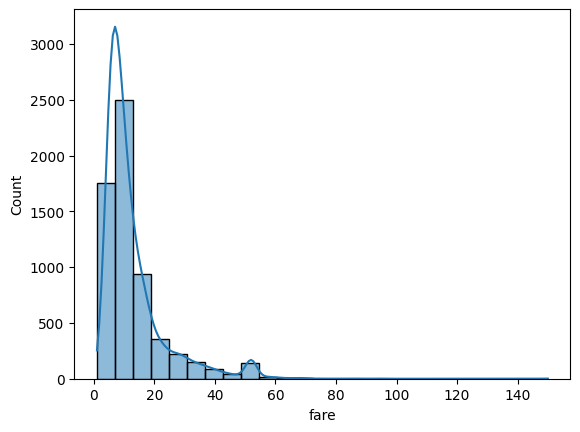

In [324]:
sns.histplot(x =df['fare'], kde = True, bins = 25)
plt.show()

[]

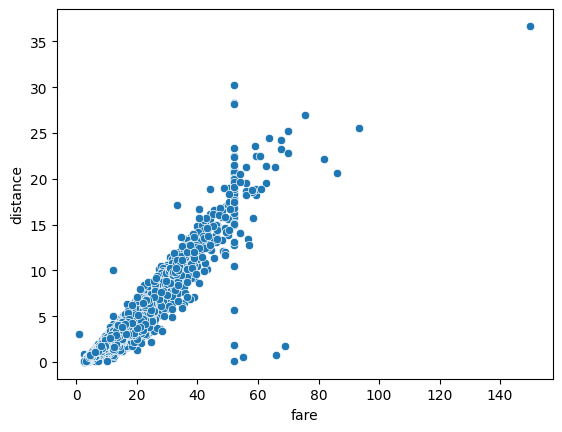

In [325]:
# checking relationship between distance vs fare

sns.scatterplot(x = df['fare'], y= df['distance'])
plt.plot()


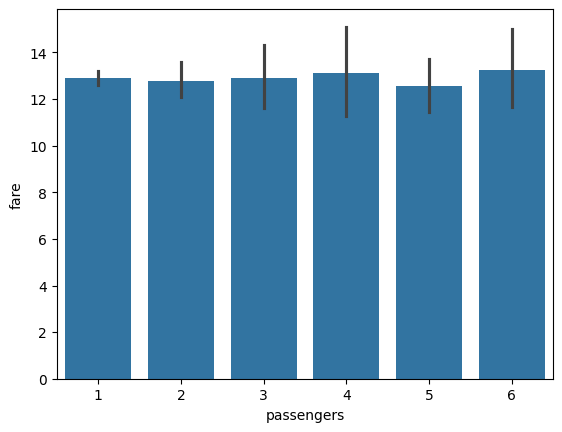

In [326]:
sns.barplot(x = df['passengers'], y = df['fare'])
plt.show()

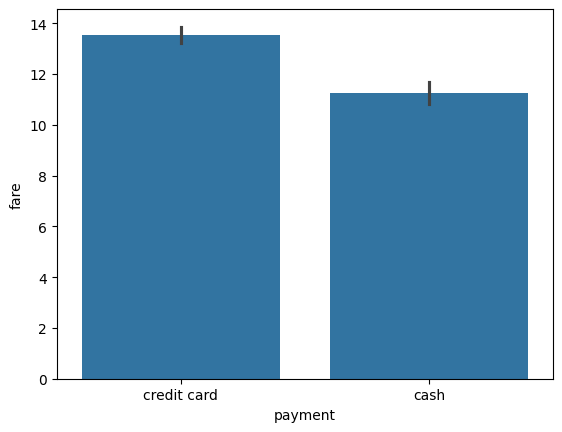

In [327]:
sns.barplot(x = df['payment'], y = df['fare'])
plt.show()

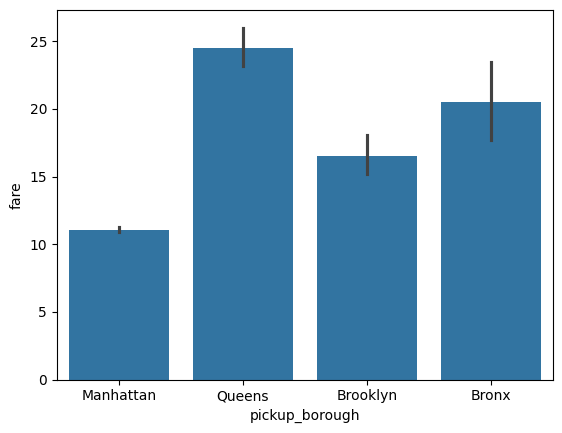

In [328]:
sns.barplot(x = df['pickup_borough'], y = df['fare'])
plt.show()

## 4. Feature Construction

In [329]:
df['pickup_hours'] = df['pickup'].dt.hour
df['pickup_dayofweek'] = df['pickup'].dt.dayofweek
df['pickup_month'] = df['pickup'].dt.month

In [330]:
df = df.drop(columns = ['pickup', 'dropoff', 'total', 'tip', 'tolls', 'pickup_zone', 'dropoff_zone'])
df.head()

,passengers,distance,fare,color,payment,pickup_borough,dropoff_borough,pickup_hours,pickup_dayofweek,pickup_month
0,1,1.60,7.0,yellow,credit card,Manhattan,Manhattan,20,5,3
1,1,0.79,5.0,yellow,cash,Manhattan,Manhattan,16,0,3
2,1,1.37,7.5,yellow,credit card,Manhattan,Manhattan,17,2,3
3,1,7.70,27.0,yellow,credit card,Manhattan,Manhattan,1,6,3
4,3,2.16,9.0,yellow,credit card,Manhattan,Manhattan,13,5,3


## 5. Feature Encoding 

In [331]:
categorical_cols = ['color','payment', 'pickup_borough', 'dropoff_borough']
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6220 entries, 0 to 6432
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   passengers                     6220 non-null   int64  
 1   distance                       6220 non-null   float64
 2   fare                           6220 non-null   float64
 3   pickup_hours                   6220 non-null   int32  
 4   pickup_dayofweek               6220 non-null   int32  
 5   pickup_month                   6220 non-null   int32  
 6   color_yellow                   6220 non-null   bool   
 7   payment_credit card            6220 non-null   bool   
 8   pickup_borough_Brooklyn        6220 non-null   bool   
 9   pickup_borough_Manhattan       6220 non-null   bool   
 10  pickup_borough_Queens          6220 non-null   bool   
 11  dropoff_borough_Brooklyn       6220 non-null   bool   
 12  dropoff_borough_Manhattan      6220 non-null   bool  

## 6. Train Test Split

In [333]:
X = df.drop('fare', axis = 1)
y = df['fare']

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

## - Scaling

In [335]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [336]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

## Evaluation Matrix

In [337]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

MAE: 1.8369006760046354
RMSE: 11.783301442135345


## Let's Try Tree based model - RandomForest

In [338]:
X = df.drop('fare', axis = 1)
y = df['fare']

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [340]:
numeric_cols = ['distance', 'passengers', 'pickup_hours', 'pickup_dayofweek', 'pickup_month']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [341]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,   # Number of trees
    max_depth=15,       # Limit tree depth to prevent overfitting
    random_state=42,
    n_jobs=-1           # Use all CPU cores
)

## - Result

In [342]:
# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print("RandomForest Regression Results:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))




RandomForest Regression Results:
MAE: 1.59
RMSE: 14.08


## Conclusion




 **Final statement (for notebook ending):**

> “This project demonstrates how careful **data cleaning, feature engineering, and model selection** can produce meaningful fare predictions. Distance dominates as the main predictor, while time and location features contribute moderately. Future improvements can focus on handling outliers and incorporating interaction features to further enhance model performance.”


